![](pictures/openvino_start.png)

# Registration (Set Up Environment)

The first step of this workshop is initializing OpenVINO environment in this Jupyter notebook. 
The OpenVINO 2020.1 package have been installed to `intel/openvino/` already.
For initializing the OpenVINO environment you should run the script `intel/openvino/bin/setupvars.sh`
If the prerequisite steps have been done right, you will see the output: 

```
[setupvars.sh] OpenVINO environment initialized
OpenVINO Inference Engine version is: 2.1.37988
```

In [1]:
!bash ~/intel/openvino/bin/setupvars.sh

from openvino import inference_engine as ie
print('OpenVINO Inference Engine version is: {}'.format(ie.__version__))

[setupvars.sh] OpenVINO environment initialized
OpenVINO Inference Engine version is: 2.1.37988


Import needed modules for the workshop

In [3]:
# mostly for working with paths: os.path
import os

# working with arrays od data
import numpy as np 

# path with data for the workshop
DATA = os.path.join('.', 'data')

# Introduction

![](pictures/training_vs_inference.png)

# Inference in 4 line

After installing OpenVINO you right off the bat can do inference

In [6]:
# Create an instance of the Inference Engine Core 
ie_core = ie.IECore()

# First load Network
network = ie.IENetwork(os.path.join(DATA, 'model.xml'), os.path.join(DATA, 'model.bin'))

# Now we load the network to device
exec_net = ie_core.load_network(network=network, device_name='CPU')

# Run inference with random data
print(exec_net.infer(inputs={'data': np.random.rand(1, 3, 227, 227)}))

{'prob': array([[[[4.85479432e-05]],

        [[2.36667984e-04]],

        [[2.62438552e-03]],

        [[1.66227086e-03]],

        [[5.61500341e-03]],

        [[7.83440750e-03]],

        [[6.96639903e-03]],

        [[2.09522987e-05]],

        [[2.10588332e-05]],

        [[1.41986500e-04]],

        [[5.65134033e-05]],

        [[6.47453780e-05]],

        [[3.56159180e-05]],

        [[1.36436967e-04]],

        [[1.41782730e-04]],

        [[2.77033905e-05]],

        [[2.26400625e-05]],

        [[4.43811514e-05]],

        [[1.84410746e-04]],

        [[6.73438699e-05]],

        [[1.86724443e-04]],

        [[1.86346413e-04]],

        [[1.18660479e-04]],

        [[1.47406041e-04]],

        [[1.93516986e-04]],

        [[2.20514892e-04]],

        [[1.76242072e-04]],

        [[2.05448814e-04]],

        [[5.11922408e-04]],

        [[2.50162702e-04]],

        [[1.61423795e-05]],

        [[8.69570824e-04]],

        [[7.11443936e-05]],

        [[2.87886243e-04]],

     

The OpenVINO package contains tools for easy download model from [OpenModelZoo](https://github.com/opencv/open_model_zoo) 
and convert the model to Intermediate Representation that OpenVINO supports

To see all available models (both public open-sourse from original frameworks (TensorFlow, Caffe, MxNet, Pytorch e.t.c),
and made in Intel).

![](pictures/models.png)

In [7]:
!python3 ${INTEL_OPENVINO_DIR}/deployment_tools/open_model_zoo/tools/downloader/downloader.py --print_all

action-recognition-0001-decoder
action-recognition-0001-encoder
age-gender-recognition-retail-0013
asl-recognition-0003
driver-action-recognition-adas-0002-decoder
driver-action-recognition-adas-0002-encoder
emotions-recognition-retail-0003
face-detection-adas-0001
face-detection-adas-binary-0001
face-detection-retail-0004
face-detection-retail-0005
face-reidentification-retail-0095
facial-landmarks-35-adas-0002
gaze-estimation-adas-0002
handwritten-score-recognition-0003
head-pose-estimation-adas-0001
human-pose-estimation-0001
image-retrieval-0001
instance-segmentation-security-0010
instance-segmentation-security-0050
instance-segmentation-security-0083
landmarks-regression-retail-0009
license-plate-recognition-barrier-0001
pedestrian-and-vehicle-detector-adas-0001
pedestrian-detection-adas-0002
pedestrian-detection-adas-binary-0001
person-attributes-recognition-crossroad-0230
person-detection-action-recognition-0005
person-detection-action-recognition-0006
person-detection-action-re

For downloading any of these models you need to use downloader

In [8]:
!python3 ${INTEL_OPENVINO_DIR}/deployment_tools/open_model_zoo/tools/downloader/downloader.py -h

usage: downloader.py [-h] [-c CONFIG.YML] [--name PAT[,PAT...]]
                     [--list FILE.LST] [--all] [--print_all]
                     [--precisions PREC[,PREC...]] [-o DIR] [--cache_dir DIR]
                     [--num_attempts N] [--progress_format {text,json}]

optional arguments:
  -h, --help            show this help message and exit
  -c CONFIG.YML, --config CONFIG.YML
                        model configuration file (deprecated)
  --name PAT[,PAT...]   download only models whose names match at least one of
                        the specified patterns
  --list FILE.LST       download only models whose names match at least one of
                        the patterns in the specified file
  --all                 download all available models
  --print_all           print all available models
  --precisions PREC[,PREC...]
                        download only models with the specified precisions
                        (actual for DLDT networks)
  -o DIR, --output_dir D

Let's try to download an object detection model `ssd_mobilenet_v2_coco`

In [9]:
!python3  ${INTEL_OPENVINO_DIR}/deployment_tools/open_model_zoo/tools/downloader/downloader.py \
--name ssd_mobilenet_v2_coco \
--output_dir ./data

################|| Downloading models ||################

========== Downloading data/public/ssd_mobilenet_v2_coco/ssd_mobilenet_v2_coco.tar.gz
... 100%, 183521 KB, 2161 KB/s, 84 seconds passed

################|| Post-processing ||################

========== Unpacking data/public/ssd_mobilenet_v2_coco/ssd_mobilenet_v2_coco.tar.gz


Model Downloader downloaded the model to `data/public/ssd_mobilenet_v2_coco/ssd_mobilenet_v2_coco_2018_03_29`

In [10]:
!ls data/public/ssd_mobilenet_v2_coco/ssd_mobilenet_v2_coco_2018_03_29

checkpoint			model.ckpt.index  saved_model
frozen_inference_graph.pb	model.ckpt.meta
model.ckpt.data-00000-of-00001	pipeline.config


Now we can try to inference the downloaded TensorFlow model

In [11]:
import os
import tensorflow as tf
from tensorflow.gfile import GFile

# Path to the Tensorflow model
model = os.path.join('data', 'public', 'ssd_mobilenet_v2_coco',
                     'ssd_mobilenet_v2_coco_2018_03_29', 'frozen_inference_graph.pb')
# SSD mobilenet v2 contains following output nodes
output_names = ['num_detections:0', 'detection_classes:0','detection_scores:0', 'detection_boxes:0']

# Create graph
graph = tf.Graph()
# Create graph definitions
graph_def = tf.GraphDef()

# Read model to the graph definitions
with open(model, "rb") as model_file:
    graph_def.ParseFromString(model_file.read())


with graph.as_default():
    # Import the graph definitions to TensorFlow
    tf.import_graph_def(graph_def, name='')
    # Get tensors for output nodes
    output_tensors = [graph.get_tensor_by_name(layer_name) for layer_name in output_names] 

    with tf.Session(graph=graph) as session:
        # Inference
        print(session.run(output_tensors, feed_dict = {'image_tensor:0' : np.random.rand(1, 300, 300, 3)}))

[array([0.], dtype=float32), array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]], dtype=float32), array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32), array([[[0., 0., 0., 0.

# What is SSD MobileNet V2?

![](pictures/mobileNet-SSD-network-architecture.png)

1. Classifier, name - `detection_classes`, contains predicted bounding boxes classes in range [1, 91]. The model was trained on Microsoft\* COCO dataset version with 90 categories of object.
2. Probability, name - `detection_scores`, contains probability of detected bounding boxes.
3. Detection box, name - `detection_boxes`, contains detection boxes coordinates in format `[y_min, x_min, y_max, x_max]`, where (`x_min`, `y_min`)  are coordinates top left corner, (`x_max`, `y_max`) are coordinates right bottom corner. Coordinates are rescaled to input image size.
4. Detections number, name - `num_detections`, contains the number of predicted detection boxes.


# Start running real Inference

For run the TensorFlow `ssd_mobilenet_v2_coco` model we need some utilitary functions:

In [15]:
# Import OpenCV for image processing
import cv2

# Import some functions from matplotlib for show barcharts
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Import some classes from display for show an image
from IPython.display import Image
# Import needed functions from TensorFlow
import tensorflow as tf
from tensorflow.python.framework import graph_io

# Import OpenVINO Inference Engine classes
from openvino.inference_engine import IENetwork, IEPlugin, IECore

# Import other needed functions
import numpy as np

import logging as log
import time
import os
import sys
import platform

In [16]:
log.basicConfig(format="[ %(levelname)s ] %(message)s", level=log.INFO, stream=sys.stdout)

# How many times we will run inference to get more valid performance
NUM_RUNS = 1 
# Number of images for one inference
BATCH = 1

# This dirrectory contains all data for the workshop
DATA = os.path.join('.', 'data')

# Path to an test image
IMAGE = os.path.join(DATA, 'images', 'input', 'dog.jpg')

# Path to the downloaded tensorflow image
SSD_ASSETS = os.path.join(DATA, 'public', 'ssd_mobilenet_v2_coco')

# Path to the downloaded frozen tensorflow image
TF_MODEL = os.path.join(SSD_ASSETS, 'ssd_mobilenet_v2_coco_2018_03_29', 'frozen_inference_graph.pb')

# Path to downloaded tensorflow image
TF_RESULT_IMAGE = os.path.join(DATA, 'images', 'output', 'tensorflow_output.png')

IE_MODEL_FP32_XML = os.path.join(SSD_ASSETS, 'FP32', 'ssd_mobilenet_v2_coco.xml')
IE_MODEL_FP32_BIN = os.path.join(SSD_ASSETS, 'FP32', 'ssd_mobilenet_v2_coco.bin')

IE_MODEL_DEFAULT_INT8_XML = os.path.join(SSD_ASSETS, 'INT8', 'default', 'optimized', 'ssd_mobilenet_v2_coco.xml')
IE_MODEL_DEFAULT_INT8_BIN = os.path.join(SSD_ASSETS, 'INT8', 'default', 'optimized', 'ssd_mobilenet_v2_coco.bin')

IE_MODEL_AA_INT8_XML = os.path.join(SSD_ASSETS, 'INT8', 'acuracy_aware', 'optimized', 'ssd_mobilenet_v2_coco.xml')
IE_MODEL_AA_INT8_BIN = os.path.join(SSD_ASSETS, 'INT8', 'acuracy_aware', 'optimized', 'ssd_mobilenet_v2_coco.bin')

IE_RESULT_IMAGE = os.path.join(DATA, 'images', 'output', 'inference_engine_output.png')

COMBO_RESULT_IMAGE = os.path.join(DATA, 'images', 'output', 'combo_output.png')

PERFORMANCE = {}

In [17]:
def read_resize_image(path_to_image: str, width: int, height: int) -> np.ndarray:
    """
    Takes an image and resizes it to the given dimensions
    """
    #Load the image 
    raw_image = cv2.imread(path_to_image)
    #Return the resized to (width, height) size image  
    return cv2.resize(raw_image, (width, height), interpolation=cv2.INTER_NEAREST)

In [18]:
def load_graph(path_to_model: str):
    """
    Creates in memory a TensorFlow graph
    """
    tf.reset_default_graph()
    graph = tf.Graph()
    graph_def = tf.GraphDef()

    with open(path_to_model, "rb") as model_file:
        graph_def.ParseFromString(model_file.read())

    nodes_to_clear_device = graph_def.node if isinstance(graph_def, tf.GraphDef) else graph_def.graph_def.node
    for node in nodes_to_clear_device:
        node.device = ""

    with graph.as_default():
        tf.import_graph_def(graph_def, name='')

    log.info("tf graph was created")
    return graph

In [19]:
def children(op_name: str, graph: tf.Graph):
    """
    Get operation node children
    """
    op = graph.get_operation_by_name(op_name)
    return set(op for out in op.outputs for op in out.consumers())

In [20]:
def summarize_graph(graph_def) -> dict:
    """
    Returns inputs and outputs layers for the graph 
    """
    unlikely_output_types = [
        'Const', 'Assign',
        'NoOp', 'Placeholder',
        'Assert', 'switch_t', 'switch_f'
    ]

    result = {
        'inputs': {},
        'outputs': []
    }
    
    with tf.Graph().as_default():
        tf.import_graph_def(graph_def, name='')
    for node in graph.as_graph_def().node:
        if node.op == 'Placeholder':
            node_dict = dict()
            node_dict['type'] = tf.DType(node.attr['dtype'].type).name
            new_shape = tf.TensorShape(node.attr['shape'].shape)
            node_dict['shape'] = str(new_shape).replace(' ', '').replace('?', '-1')
            result['inputs'][node.name] = node_dict
        if len(children(node.name, graph)) == 0:
            if node.op not in unlikely_output_types and \
                node.name.split('/')[-1] not in unlikely_output_types:
                result['outputs'].append(node.name)
    return result

In [21]:
def get_refs(graph: tf.Graph, input_data: dict):
    """
    Return TensorFlow model reference results
    """
    log.info("Running inference with tensorflow ...")
    feed_dict = {}
    summary_info = summarize_graph(graph.as_graph_def())
    input_layers, output_layers = list(summary_info['inputs'].keys()), summary_info['outputs']

    data_keys = [key for key in input_data.keys()]
    if sorted(input_layers) != sorted(data_keys):
        raise ValueError('input data keys: {0} do not match input '
                         'layers of network: {1}'.format(data_keys, input_layers))

    for input_layer_name in input_layers:
        tensor = graph.get_tensor_by_name(input_layer_name + ':0')
        feed_dict[tensor] = input_data[input_layer_name]
    output_tensors = []
    for name in output_layers:
        tensor = graph.get_tensor_by_name(name + ':0')
        output_tensors.append(tensor)

    log.info("Running tf.Session")
    with graph.as_default():
        with tf.Session(graph=graph) as session:
            inference_start = time.time()
            outputs = session.run(output_tensors, feed_dict=feed_dict)
            inference_end = time.time()
    res = dict(zip(output_layers, outputs))
    log.info("TensorFlow reference collected successfully\n")
    return res, inference_end - inference_start

In [22]:
def tf_main(path_to_model: str, path_to_original_image: str, batch: int = 1):
    """
    Entrypoint for inferencing with TensorFlow
    """
    log.info('COMMON: image preprocessing')
    width = 300
    resized_image = read_resize_image(path_to_original_image, width, width)
    reshaped_image = np.reshape(resized_image, (width, width, 3))
    batched_image = np.array([reshaped_image for _ in range(batch)])
    
    log.info('Current shape: {}'.format(batched_image.shape))

    log.info('TENSORFLOW SPECIFIC: Loading a model with TensorFLow')
    graph = load_graph(path_to_model)

    input_data = {
        'image_tensor': batched_image,
    }

    raw_results, delta = get_refs(graph, input_data)
    log.info('TENSORFLOW SPECIFIC: Plain inference finished')

    log.info('TENSORFLOW SPECIFIC: Post processing started')
#     processed_results = parse_od_output(raw_results)
    log.info('TENSORFLOW SPECIFIC: Post processing finished')

    return raw_results, delta

# All ready for inference the model in the real image

In [24]:
framework = 'TF'
device = 'CPU'
name = '{f} on {d}'.format(f=framework, d=device)

tensorflow_fps_collected = []

# Running NUM_RUNS inferences for more correct perf results 
for i in range(NUM_RUNS):
    # Run inference on TensorFlow
    tensorflow_predictions, tensorflow_inference_time = tf_main(TF_MODEL, IMAGE, batch=BATCH)
    
    log.info('Inference Time of SSD MobileNet V2 {} is {}'.format(name, tensorflow_inference_time))
    
    # Calculate FPS from inference time
    tensorflow_fps = 1 / tensorflow_inference_time
    
    tensorflow_fps_collected.append(tensorflow_fps)

# Calculate the average FPS for all inferences
tensorflow_avg_fps = (sum(tensorflow_fps_collected) * BATCH) / (NUM_RUNS)

log.info('{} FPS: {}'.format(name, tensorflow_avg_fps))

[ INFO ] COMMON: image preprocessing
[ INFO ] Current shape: (1, 300, 300, 3)
[ INFO ] TENSORFLOW SPECIFIC: Loading a model with TensorFLow
[ INFO ] tf graph was created
[ INFO ] Running inference with tensorflow ...
[ INFO ] Running tf.Session
[ INFO ] TensorFlow reference collected successfully

[ INFO ] TENSORFLOW SPECIFIC: Plain inference finished
[ INFO ] TENSORFLOW SPECIFIC: Post processing started
[ INFO ] TENSORFLOW SPECIFIC: Post processing finished
[ INFO ] Inference Time of SSD MobileNet V2 TF on CPU is 4.448185443878174
[ INFO ] TF on CPU FPS: 0.22481077118226994


In [25]:
print(tensorflow_predictions['num_detections'][0]) # get number of detected objects
print(tensorflow_predictions['detection_classes'][0])# get predicted classes ids
print(tensorflow_predictions['detection_scores'][0]) # get probabilities for predicted classes
print(tensorflow_predictions['detection_boxes'][0]) # get boxes for predicted classes

1.0
[18.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[0.9347069 0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.

For using Inference Engine we need convert the downloaded TensorFlow model to the Intermediate Representation (IR)

In [ ]:
![](./pictures/model_optimizer.png)

In [49]:
!python3 ${INTEL_OPENVINO_DIR}/deployment_tools/open_model_zoo/tools/downloader/converter.py \
--name ssd_mobilenet_v2_coco \
--download_dir ./data \
--output_dir ./data \
--precisions FP32

========= Converting ssd_mobilenet_v2_coco to IR (FP32)
Conversion command: /home/atugarev/Developer/openvino_workshop/env/bin/python3 -- /home/atugarev/intel/openvino_2020.1.023/deployment_tools/model_optimizer/mo.py --framework=tf --data_type=FP32 --output_dir=data/public/ssd_mobilenet_v2_coco/FP32 --model_name=ssd_mobilenet_v2_coco --reverse_input_channels '--input_shape=[1,300,300,3]' --input=image_tensor --transformations_config=/home/atugarev/intel/openvino_2020.1.023/deployment_tools/model_optimizer/extensions/front/tf/ssd_v2_support.json --tensorflow_object_detection_api_pipeline_config=data/public/ssd_mobilenet_v2_coco/ssd_mobilenet_v2_coco_2018_03_29/pipeline.config --output=detection_classes,detection_scores,detection_boxes,num_detections --input_model=data/public/ssd_mobilenet_v2_coco/ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/home/atugarev/Developer/openvino_workshop/data/public/ss

![](./pictures/openvino_support.png)

In [26]:
def ie_main(path_to_model_xml: str, path_to_model_bin: str, path_to_original_image: str, device='CPU', batch=1):
    """
    Entrypoint for inferencing with OpenVINO Inference Engine
    """
    # First create Network (Note you need to provide model in IR previously converted with Model Optimizer)
    log.info("Reading IR...")
    net = IENetwork(model=path_to_model_xml, weights=path_to_model_bin)

    # Now let's create IECore() entity 
    log.info("Creating Inference Engine Core")   
    ie = IECore()

    # Get input and output blob of the network
    input_blob = next(iter(net.inputs))
    out_blob = next(iter(net.outputs))

    # Reshape the network to the needed batch
    n, c, h, w = net.inputs[input_blob].shape
    net.reshape({input_blob: (batch, c, h, w)})
    n, c, h, w = net.inputs[input_blob].shape
    
    # Resize the image 
    log.info('COMMON: image preprocessing')
    image = read_resize_image(path_to_original_image, h, w)
    
    # Now we load Network to plugin
    log.info("Loading IR to the plugin...")
    exec_net = ie.load_network(network=net, device_name=device, num_requests=2)

    del net

    labels_map = None
    
    # Read and pre-process input image
    image = image[..., ::-1]
    in_frame = image.transpose((2, 0, 1))  # Change data layout from HWC to CHW
    batched_frame = np.array([in_frame for _ in range(batch)])
    log.info('Current shape: {}'.format(batched_frame.shape))

    # Now we run inference on target device
    inference_start = time.time()
    res = exec_net.infer(inputs={input_blob: batched_frame})
    inference_end = time.time()

    log.info('INFERENCE ENGINE SPECIFIC: no post processing')

    return res[out_blob], inference_end - inference_start

In [28]:
def ie_inference(xml:str, bin:str, device:str, postfix: str = ''):
    name = '{f} {p} on {d}'.format(f='IE', p=postfix, d=device)

    inference_engine_fps_collected = []

    for i in range(NUM_RUNS):
        # Run inference on OpenVINO Inference Engine
        predictions, inference_time = ie_main(xml, bin,
                                              IMAGE,
                                              device,
                                              batch=BATCH)
        
        log.info('Inference Time of SSD MobileNet V2 {} is {}'.format(name, inference_time))
        # Calculate FPS from inference time
        inference_engine_fps = 1 / inference_time
        
        inference_engine_fps_collected.append(inference_engine_fps)

    # Calculate the average FPS for all inferences
    inference_engine_avg_fps = (sum(inference_engine_fps_collected) * BATCH) / (NUM_RUNS)
    
    PERFORMANCE[name] = inference_engine_avg_fps

    log.info('{} FPS: {}'.format(name, inference_engine_avg_fps))
    
    return inference_engine_avg_fps, predictions

In [29]:
device = 'CPU'

inference_engine_avg_fps, inference_engine_predictions = ie_inference(IE_MODEL_FP32_XML, 
                                                                      IE_MODEL_FP32_BIN, 
                                                                      device)

[ INFO ] Reading IR...
[ INFO ] Creating Inference Engine Core
[ INFO ] COMMON: image preprocessing
[ INFO ] Loading IR to the plugin...
[ INFO ] Current shape: (1, 3, 300, 300)
[ INFO ] INFERENCE ENGINE SPECIFIC: no post processing
[ INFO ] Inference Time of SSD MobileNet V2 IE  on CPU is 0.009589672088623047
[ INFO ] IE  on CPU FPS: 104.2788523693501


In [45]:
def show_performance(performance_data: dict):
    """
    Takes dictionary contains name of configurations as keys and FPS for it as values
    Plots bar chart with data
    """
    l = np.arange(len(performance_data))
    
    performance = [fps for _, fps in performance_data.items()]
    configurations = list(performance_data.keys())
    figsize=(3*len(performance_data),10)
    fig, ax = plt.subplots(figsize=figsize)
    
    bars = ax.bar(x=l, height=performance, tick_label=configurations)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)
   
    bar_color = bars[0].get_facecolor()

    for bar in bars:
      ax.text(
          bar.get_x() + bar.get_width() / 2,
          bar.get_height() + 5,
          round(bar.get_height(), 1),
          horizontalalignment='center',
          color=bar_color,
          weight='bold',
          fontsize=17
      )
    ax.set_xlabel('Configurations', labelpad=15, color='#333333')
    ax.set_ylabel('Frame per seconds', labelpad=15, color='#333333')
    ax.set_title('Performance mesuarments', pad=15, color='#333333', weight='bold')
    plt.ylim(0, max(performance)+20)
    fig.tight_layout()

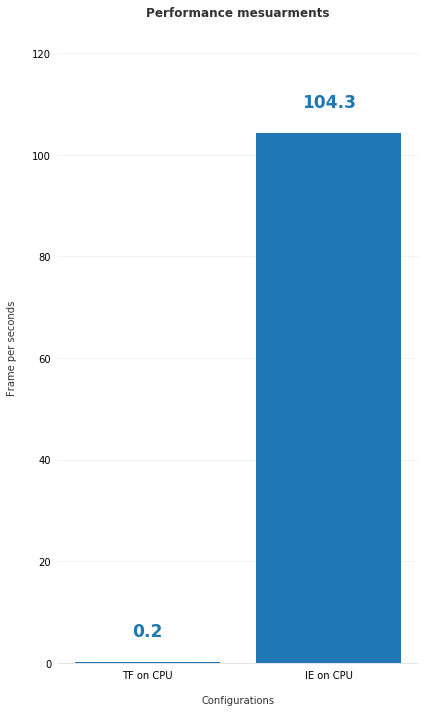

In [46]:
performance_data = {
    'TF on CPU': tensorflow_avg_fps,
    'IE on CPU': inference_engine_avg_fps
}
show_performance(performance_data)

In [31]:
data_batch = inference_engine_predictions[0] # get data for the image
data_object = data_batch[0][0] # get data for the first fonded object
print(data_object[1]) # get predicted classes ids
print(data_object[2]) # get probabilities for predicted classes
print(data_object[3:]) # get boxes for predicted classes

18.0
0.9347068
[0.0088701  0.25379565 0.9248868  0.978884  ]


In [33]:
def parse_od_output(data: dict):
    """
    Procesed inference results of the Tensorflow model 
    and leads to the OpenVINO Inference Engine form
    """
    predictions = []
    num_batches = len(data['detection_boxes'])
    target_layers = ['num_detections', 'detection_classes',
                     'detection_scores', 'detection_boxes']

    for b in range(num_batches):
        predictions.append([])
        num_detections = int(data['num_detections'][b])
        detection_classes = data['detection_classes'][b]
        detection_scores = data['detection_scores'][b]
        detection_boxes = data['detection_boxes'][b]
        for i in range(num_detections):
            obj = [
                b, detection_classes[i], detection_scores[i],
                detection_boxes[i][1], detection_boxes[i][0],
                detection_boxes[i][3], detection_boxes[i][2]
            ]
            predictions[b].append(obj)
    predictions = np.asarray(predictions)
    new_shape = (1, 1, predictions.shape[0] * predictions.shape[1], predictions.shape[2])
    predictions = np.reshape(predictions, newshape=new_shape)
    parsed_data = {'tf_detections': predictions}
    for layer, blob in data.items():
        if layer not in target_layers:
            parsed_data.update({layer: blob})
    return parsed_data

In [36]:
def draw_image(original_image: str,
               res: tuple,
               path_to_image: str,
               prob_threshold: float=0.8,
               color: tuple=(0, 255, 0)):
    """
    Takes a path to the image and bounding boxes. 
    Draws those boxes on the new image and saves it
    """
    raw_image = cv2.imread(original_image)
    initial_w = raw_image.shape[1]
    initial_h = raw_image.shape[0]
    labels_map = { 18: 'dog' }
    for obj in res[0][0]:
        # Draw only objects when probability more than specified threshold
        if obj[2] > prob_threshold:
            xmin = int(obj[3] * initial_w)
            ymin = int(obj[4] * initial_h)
            xmax = int(obj[5] * initial_w)
            ymax = int(obj[6] * initial_h)
            class_id = int(obj[1])
            confidence = round(obj[2] * 100, 1)
            cv2.rectangle(raw_image, (xmin, ymin), (xmax, ymax), color, 2)
            det_label = labels_map[class_id] if labels_map else str(class_id)
            box_title = '{} {}%'.format(det_label, confidence)
            cv2.putText(raw_image,
                        box_title,
                        (xmin, ymin - 7),
                        cv2.FONT_HERSHEY_COMPLEX, 5, color, cv2.LINE_AA)
    cv2.imwrite(path_to_image, raw_image)

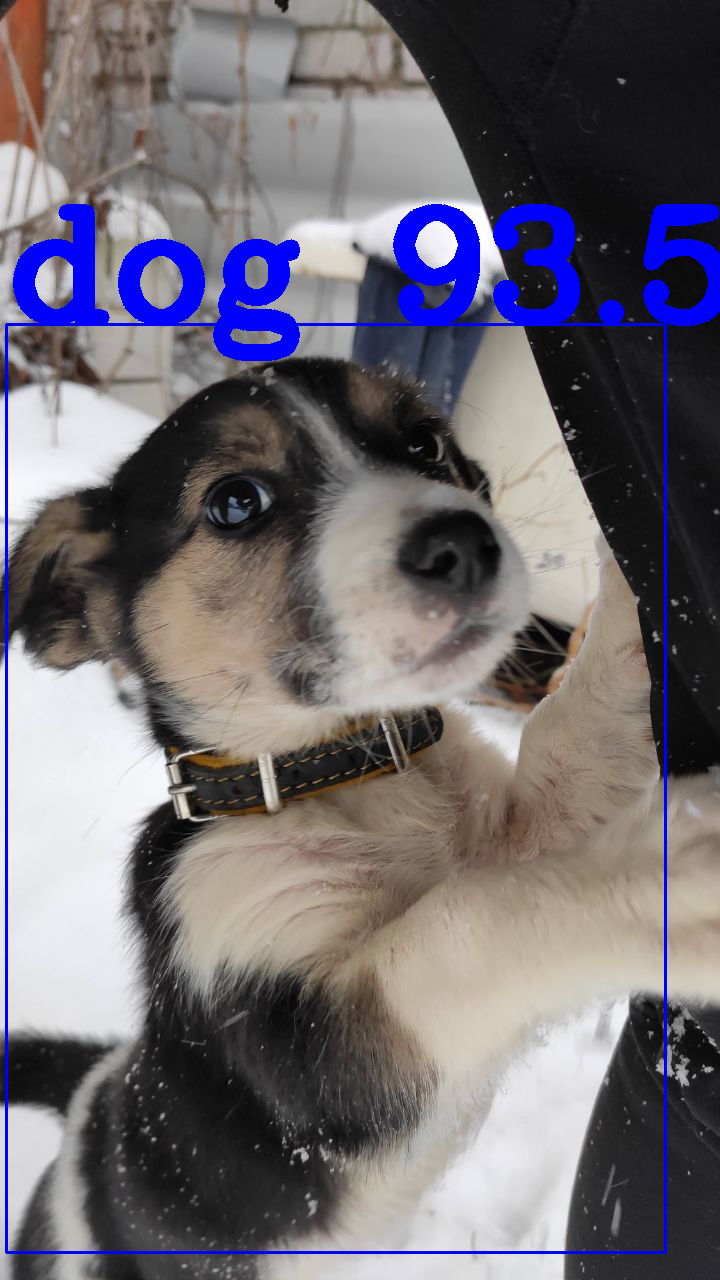

In [37]:
tensorflow_detections = parse_od_output(tensorflow_predictions)['tf_detections']
draw_image(IMAGE, tensorflow_detections, TF_RESULT_IMAGE, color=(255, 0, 0))
Image(filename=TF_RESULT_IMAGE) 

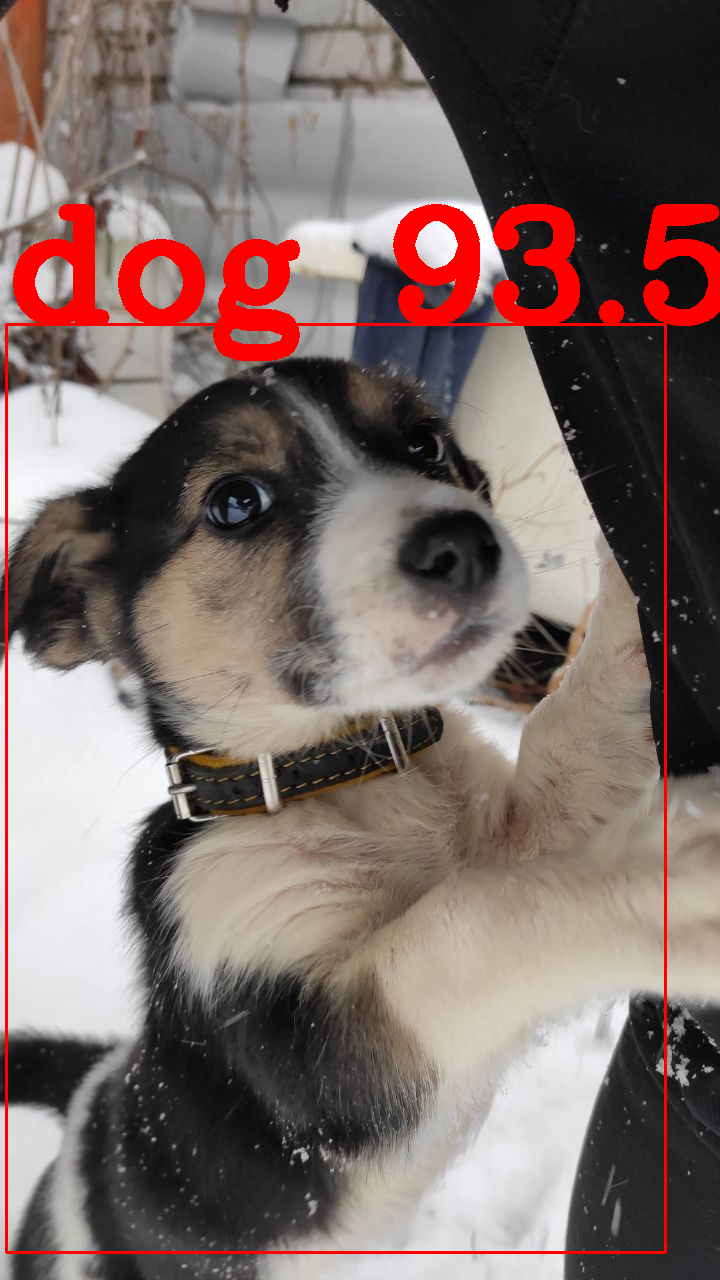

In [39]:
draw_image(TF_RESULT_IMAGE, inference_engine_predictions, COMBO_RESULT_IMAGE, color=(0, 0, 255))
Image(filename=COMBO_RESULT_IMAGE) 

In [40]:
def show_results_interactively(tf_image: str, ie_image: str, combination_image: str, ie_fps:float, tf_fps:float):
    """
    Takes paths to three images and shows them with matplotlib on one screen
    """
    _ = plt.figure(figsize=(30, 10))
    gs1 = gridspec.GridSpec(1, 3)
    gs1.update(wspace=0.25, hspace=0.05)

    titles = [
        '(a) Tensorflow',
        '(b) Inference Engine',
        '(c) TensorFlow and Inference Engine\n predictions are identical'
    ]

    for i, path in enumerate([tf_image, ie_image, combination_image]):
        img_resized = cv2.imread(path)
        ax_plot = plt.subplot(gs1[i])
        ax_plot.axis("off")
        addon = ' '
        if i == 1:
            addon += '{:4.3f}'.format(ie_fps) + '(FPS)'
        elif i == 0:
            addon += '{:4.3f}'.format(tf_fps) + '(FPS)'

        ax_plot.text(0.5, -0.5, titles[i] + addon,
                     size=28, ha="center",
                     transform=ax_plot.transAxes)
        ax_plot.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

    plt.show()

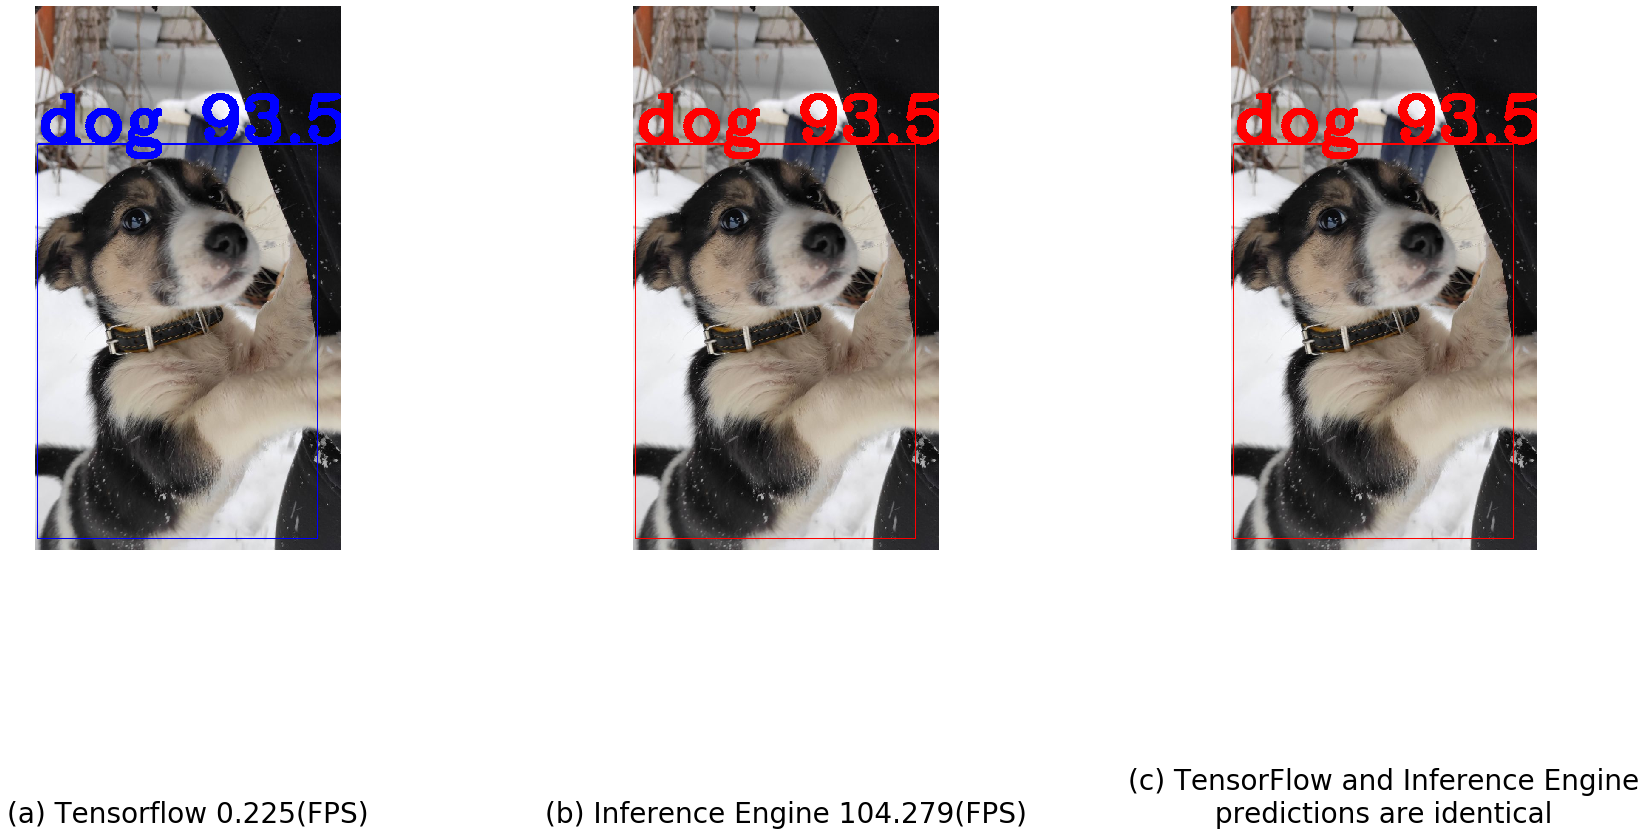

In [41]:
show_results_interactively(tf_image=TF_RESULT_IMAGE,
                           ie_image=IE_RESULT_IMAGE,
                           combination_image=COMBO_RESULT_IMAGE,
                           ie_fps=inference_engine_avg_fps,
                           tf_fps=tensorflow_avg_fps)

Oh, this is good. The same results in one image. But it is onlu ONE image. 
We need check accuracy on full dataset
And how can we do this?

In [ ]:
!accuracy_check -c data/configs/accuracy_checker_config_tf.yml

Processing info:
model: ssd_mobilenet_v2_coco
launcher: tf
device: CPU
dataset: ms_coco_detection_91_classes
OpenCV version: 4.2.0-openvino
200it [00:00, 8259.02it/s]


  0%|                                                          | 0/200 [00:00<?]WARNING:tensorflow:From /home/atugarev/intel/openvino_2020.1.023/deployment_tools/open_model_zoo/tools/accuracy_checker/accuracy_checker/launcher/tf_launcher.py:97: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2020-02-12 13:00:56.525212: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2020-02-12 13:00:56.546946: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3696000000 Hz
2020-02-12 13:00:56.547712: I tensorflow/compiler/xla/service/service.cc:

Break

In [50]:
!accuracy_check -c data/configs/accuracy_checker_config.yml

Processing info:
model: ssd_mobilenet_v1_coco
launcher: dlsdk
launcher tags: FP32
device: CPU
dataset: ms_coco_detection_91_classes
OpenCV version: 4.2.0-openvino
13:24:12 accuracy_checker ERROR: 'str' object has no attribute 'parent'
Traceback (most recent call last):
  File "/home/atugarev/intel/openvino_2020.1.023/deployment_tools/open_model_zoo/tools/accuracy_checker/accuracy_checker/main.py", line 227, in main
    evaluator = evaluator_class.from_configs(config_entry)
  File "/home/atugarev/intel/openvino_2020.1.023/deployment_tools/open_model_zoo/tools/accuracy_checker/accuracy_checker/evaluators/model_evaluator.py", line 61, in from_configs
    dataset = Dataset(dataset_config)
  File "/home/atugarev/intel/openvino_2020.1.023/deployment_tools/open_model_zoo/tools/accuracy_checker/accuracy_checker/dataset.py", line 54, in __init__
    self._load_annotation()
  File "/home/atugarev/intel/openvino_2020.1.023/deployment_tools/open_model_zoo/tools/accuracy_checker/accuracy_checker/da

In [51]:
device = 'CPU'
ie_avg_fps, predictions = ie_inference(IE_MODEL_DEFAULT_INT8_XML, IE_MODEL_DEFAULT_INT8_BIN, device, 'INT8 D')

draw_image(TF_RESULT_IMAGE, predictions, COMBO_RESULT_IMAGE, color=(0, 0, 255))

show_results_interactively(tf_image=TF_RESULT_IMAGE,
                           ie_image=IE_RESULT_IMAGE,
                           combination_image=COMBO_RESULT_IMAGE,
                           ie_fps=ie_avg_fps,
                           tf_fps=tf_avg_fps)

show_performance(PERFORMANCE)

[ INFO ] Reading IR...


Exception: Path to the model ./data/public/ssd_mobilenet_v2_coco/INT8/default/optimized/ssd_mobilenet_v2_coco.xml doesn't exists or it's a directory

# END

In [ ]:
device = 'CPU'
ie_avg_fps, predictions = ie_inference(IE_MODEL_FP32_XML, IE_MODEL_FP32_BIN, device, '')

draw_image(TF_RESULT_IMAGE, predictions, COMBO_RESULT_IMAGE, color=(0, 0, 255))

show_results_interactively(tf_image=TF_RESULT_IMAGE,
                           ie_image=IE_RESULT_IMAGE,
                           combination_image=COMBO_RESULT_IMAGE,
                           ie_fps=ie_avg_fps,
                           tf_fps=tf_avg_fps)

show_performance(PERFORMANCE)

In [ ]:
!accuracy_check -c data/configs/accuracy_checker_config.yml

In [ ]:
!python3 ${INTEL_OPENVINO_DIR}/deployment_tools/tools/post_training_optimization_toolkit/main.py \
-c data/configs/default/quantization_config.json \
--output-dir data/public/ssd_mobilenet_v2_coco/INT8/default \
--direct-dump

In [ ]:
device = 'CPU'
ie_avg_fps, predictions = ie_inference(IE_MODEL_DEFAULT_INT8_XML, IE_MODEL_DEFAULT_INT8_BIN, device, 'INT8 D')

draw_image(TF_RESULT_IMAGE, predictions, COMBO_RESULT_IMAGE, color=(0, 0, 255))

show_results_interactively(tf_image=TF_RESULT_IMAGE,
                           ie_image=IE_RESULT_IMAGE,
                           combination_image=COMBO_RESULT_IMAGE,
                           ie_fps=ie_avg_fps,
                           tf_fps=tf_avg_fps)

show_performance(PERFORMANCE)

In [ ]:
!accuracy_check -c data/configs/default/accuracy_checker_config.yml

In [ ]:
!python3 ${INTEL_OPENVINO_DIR}/deployment_tools/tools/post_training_optimization_toolkit/main.py \
-c data/configs/accuracy_aware/quantization_config.json \
--output-dir data/public/ssd_mobilenet_v2_coco/INT8/acuracy_aware \
--direct-dump

In [ ]:
device = 'CPU'
ie_avg_fps, predictions = ie_inference(IE_MODEL_AA_INT8_XML, IE_MODEL_AA_INT8_BIN, device, 'INT8 AA')

draw_image(TF_RESULT_IMAGE, predictions, COMBO_RESULT_IMAGE, color=(0, 0, 255))

show_results_interactively(tf_image=TF_RESULT_IMAGE,
                           ie_image=IE_RESULT_IMAGE,
                           combination_image=COMBO_RESULT_IMAGE,
                           ie_fps=ie_avg_fps,
                           tf_fps=tf_avg_fps)

show_performance(PERFORMANCE)

In [ ]:
!accuracy_check -c data/configs/accuracy_aware/accuracy_checker_config.yml

In [ ]:
!${INTEL_OPENVINO_DIR}/deployment_tools/inference_engine/samples/cpp/build/intel64/Release/benchmark_app -h

In [ ]:
!${INTEL_OPENVINO_DIR}/deployment_tools/inference_engine/samples/cpp/build/intel64/Release/benchmark_app -m data/public/ssd_mobilenet_v2_coco/FP32/ssd_mobilenet_v2_coco.xml

# Practice

In [ ]:
!pip install ipywebrtc

In [ ]:
import os

# Read/write video, work with images
import cv2

# Inference
from openvino.inference_engine import IENetwork, IECore

# Show videos in the notebook
from ipywidgets import Video

In [ ]:
MODEL_PATH_XML = IE_MODEL_FP32_XML
MODEL_PATH_BIN = IE_MODEL_FP32_BIN

DEVICE = 'CPU'

DATA_PATH = os.path.join('practice', 'data')
INPUT_VIDEO = os.path.join(DATA_PATH, 'artyom.MP4')
OUTPUT_VIDEO = os.path.join(DATA_PATH, 'out_artyom.MP4')

LABELS_PATH = os.path.join(DATA_PATH, 'coco_labels.txt')

In [ ]:
Video.from_file(INPUT_VIDEO)

In [ ]:
def prapare_out_video_stream(input_video_stream):
    width  = int(input_video_stream.get(3))
    height = int(input_video_stream.get(4))
    return cv2.VideoWriter(OUTPUT_VIDEO, cv2.VideoWriter_fourcc(*'X264'), 20, (width, height))

In [ ]:
# Create object of IECore. 
# This class represents an Inference Engine entity 
# and allows you to manipulate with plugins using unified interfaces
ie = IECore()

# Load network as Intermediate Representation 
# The IENetwork class contains the information about the network model read from Intermediate Representation
# and allows you to manipulate with some model parameters such as layers affinity and output layers
net = IENetwork(model=MODEL_PATH_XML, weights=MODEL_PATH_BIN)

# Get names of input layers of the network
input_blob = next(iter(net.inputs))

print('Input layer of the network is {}'.format(input_blob))

# Get shape (dimensions) of the input layer of the network
# n - number of batch
# c - number of an input image channels (usualy 3 - R, G and B) 
# h - height
# w - width
n, c, h, w = net.inputs[input_blob].shape

print('Input shape of the network is [{}, {}, {}, {}]'.format(n, c, h, w))

# Get names of output layers of the network
out_blob = next(iter(net.outputs))

print('Output layer of the network is {}'.format(out_blob))

# Load names of COCO classes from the file 
with open(LABELS_PATH, 'r') as f:
    labels_map = [x.strip() for x in f]

# Load the network to the device
# The load_network function returns an object of ExecutableNetwork
# This class represents a network instance loaded to plugin and ready for inference
exec_net = ie.load_network(network=net, num_requests=2, device_name=DEVICE)


# Open an input video
input_video_stream = cv2.VideoCapture(INPUT_VIDEO)

# Create an output video stream
out = prapare_out_video_stream(input_video_stream)



feed_dict = {}

cur_request_id = 0
next_request_id = 1

# Do loop ny input video
while input_video_stream.isOpened():
    
    # Read the next frame from the intput video 
    ret, frame = input_video_stream.read()
    # Check if video is over
    if not ret:
        # Exit from the loop if video is over
        break 
    # Get height and width of the frame
    frame_h, frame_w = frame.shape[:2]
    
    # Resize the frame to network's input 
    in_frame = cv2.resize(frame, (w, h))
    
    # Change data layout from HWC to CHW
    in_frame = in_frame.transpose((2, 0, 1))  
    
    # Reshape the frame to network's input 
    in_frame = in_frame.reshape((n, c, h, w))
    
    # Prepare data for network.
    # This must be a dictionary: 
    #   key - name of the input layer
    #   value - input data (the prepared frame)  
    feed_dict[input_blob] = in_frame
    
    # Start Asynchronous Inference.
    # We must set request_id - number or identificator of Inference Request
    # and input data - the dictionary
    exec_net.start_async(request_id=cur_request_id, inputs=feed_dict)
    
    # Wait the inference request until Inference Engine finished the inference of the request
    if exec_net.requests[cur_request_id].wait(-1) == 0:
        # Read result of the inference from the out layer of the execution network 
        inference_request_result = exec_net.requests[cur_request_id].outputs[out_blob]
        
        # Iterate by all found objects
        for obj in inference_request_result[0][0]:
            # Draw only objects when probability more than specified threshold
            if obj[2] > 0.5:
                # Get coordinates of the found object
                # and scale it to the original size of the frame
                xmin = int(obj[3] * frame_w)
                ymin = int(obj[4] * frame_h)
                xmax = int(obj[5] * frame_w)
                ymax = int(obj[6] * frame_h)
                
                # Get class ID of the found object
                class_id = int(obj[1])
                
                # Get confidence for the found object.
                confidence = round(obj[2] * 100, 1)
                
                # Draw box and label
                color = (min(class_id * 12.5, 255), min(class_id * 7, 255), min(class_id * 5, 255))
                cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), color, 2)
                
                # Get label of the class
                label = labels_map[class_id]
                
                # Create titel of the object
                text = '{}: {}% '.format(label, confidence)
                
                # Put the titel to the frame
                cv2.putText(frame, text, (xmin, ymin - 7), cv2.FONT_HERSHEY_COMPLEX, 2, color, 2)
        
    # Write the result frame to the out stream
    out.write(frame)

# Save result video
out.release()

In [ ]:
Video.from_file(OUTPUT_VIDEO)